# <span style="color:DarkOliveGreen">LSTM Forecast of CDX.NA.IG

__Summary:__ <span style="color:Blue">Use LSTM model to fit and predict

In [2]:
# Import required libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense
import os
np.random.seed(0)

In [3]:
# User defined names
index = "CDX.NA.IG"
filename = "input_data.csv"
date_col = "Date"

In [4]:
# Get current working directory
mycwd = os.getcwd()
print(mycwd)

C:\Users\rsingh\Desktop\World Quant\Capstone\GitHub_main\Notebooks


In [5]:
# Change to data directory
os.chdir("..")
os.chdir(str(os.getcwd()) + "\\Data")

In [6]:
# Read the data
df = pd.read_csv(filename, index_col=date_col)
#df.index = pd.to_datetime(df.index)
df.head()

,IG_BO,SPX,VIX,UST_3M,UST_6M,UST_1Y,UST_2Y,UST_3Y,UST_5Y,UST_7Y,UST_10Y,UST_20Y,UST_30Y,IG_MID
Date,,,,,,,,,,,,,,
2018-01-01,0.574,2673.61,11.04,1.39,1.53,1.76,1.89,1.98,2.20,2.33,2.40,2.58,2.74,49.020
2018-01-02,0.400,2695.81,9.77,1.44,1.61,1.83,1.92,2.01,2.25,2.38,2.46,2.64,2.81,48.455
2018-01-03,0.444,2713.06,9.15,1.41,1.59,1.81,1.94,2.02,2.25,2.37,2.44,2.62,2.78,47.095
2018-01-04,0.467,2723.99,9.22,1.41,1.60,1.82,1.96,2.05,2.27,2.38,2.46,2.62,2.79,45.877
2018-01-05,0.475,2743.15,9.22,1.39,1.58,1.80,1.96,2.06,2.29,2.40,2.47,2.64,2.81,45.518


In [33]:
df = df[:500]

## <span style="color:DarkOliveGreen">Functions

In [7]:
from datetime import datetime

def days_between(d1, d2):
    d1 = datetime.strptime(d1, "%Y-%m-%d")
    d2 = datetime.strptime(d2, "%Y-%m-%d")
    return abs((d2 - d1).days)

In [8]:
def create_dataset(n_X, look_back):
    dataX, dataY = [], []
    for i in range(len(n_X)-look_back):
        a = n_X[i:(i+look_back), ]
        dataX.append(a)
        dataY.append(n_X[i + look_back, ])
        
    return np.array(dataX), np.array(dataY)

In [9]:
x=list((df.index))
y=list((df['IG_MID'].values))

x_n = [days_between(i, x[-1]) for i in x]
x_n = [1+x.index(i) for i in x]

trainx, testx = x_n[0:int(0.8*(len(x)))], x_n[int(0.8*(len(x))):]
trainy, testy = y[0:int(0.8*(len(y)))], y[int(0.8*(len(y))):]
train = np.array(list(zip(trainx,trainy)))
test = np.array(list(zip(trainx,trainy)))


look_back = 10
trainx_lstm,trainy_lstm = create_dataset(train, look_back)
testx_lstm,testy_lstm = create_dataset(test, look_back)

trainx_lstm = np.reshape(trainx_lstm, (trainx_lstm.shape[0], look_back, 2))
testx_lstm = np.reshape(testx_lstm, (testx_lstm.shape[0], look_back, 2))

In [10]:
model = Sequential()
model.add(LSTM(512, return_sequences = True, input_shape = (trainx_lstm.shape[1], 2)))
model.add(LSTM(256,input_shape = (trainx_lstm.shape[1], 2)))
model.add(Dense(2))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 512)           1054720   
                                                                 
 lstm_1 (LSTM)               (None, 256)               787456    
                                                                 
 dense (Dense)               (None, 2)                 514       
                                                                 
Total params: 1,842,690
Trainable params: 1,842,690
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.fit(trainx_lstm, trainy_lstm, epochs = 2000, batch_size = 10, verbose = 0, shuffle = False)
model.save_weights('LSTMBasic_IG.h5')

In [12]:
trainx_lstm.shape

(1481, 10, 2)

## <span style="color:DarkOliveGreen">LSTM time Plots

In [13]:
model.load_weights('LSTMBasic_IG.h5')
predict = model.predict(testx_lstm)

47/47 [==============================] - 3s 51ms/step


In [14]:
# Change to Images directory
os.chdir("..")
os.chdir(str(os.getcwd()) + "\\Images")

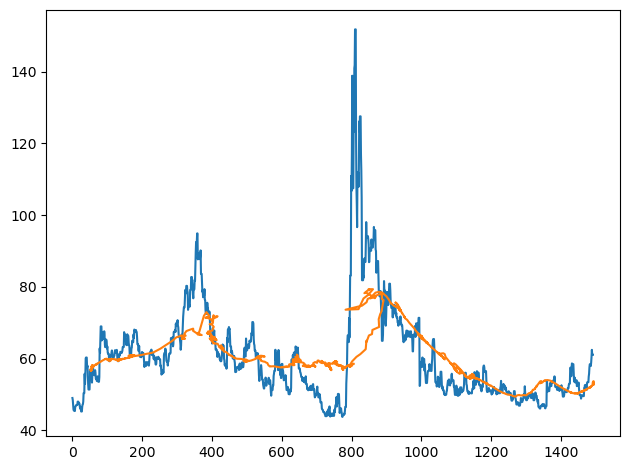

In [15]:
plt.plot(trainx, trainy,'-')
plt.plot(predict[:,0:1], predict[:,1:2],'-')
plt.tight_layout()
plt.savefig('Fitted_LSTM_LB_ '+ str(look_back) +'.png')
plt.show()
plt.close()

In [76]:
testx.shape

(395, 5, 2)

In [77]:
testx[0]

array([[ 1.   , 49.02 ],
       [ 2.   , 48.455],
       [ 3.   , 47.095],
       [ 4.   , 45.877],
       [ 5.   , 45.518]])

## <span style="color:DarkOliveGreen">Save the Data

In [44]:
os.chdir("..")
os.chdir(str(os.getcwd()) + "\\Data")
#df.to_csv(index +"_data"+".csv", index=True)